In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [65]:
udemy = pd.read_csv('/Users/Mickey/Downloads/udemy_courses.csv')
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [66]:
del udemy['course_id']
del udemy['url']

In [67]:
udemy.dtypes

course_title            object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [68]:
udemy['is_paid'] = udemy['is_paid'].astype('category')

In [69]:
udemy['is_paid'] = udemy['is_paid'].cat.codes


In [71]:
udemy['level'] = udemy['level'].astype('category')

In [72]:
udemy['level'] = udemy['level'].cat.codes


In [73]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])


In [74]:
udemy


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,Learn and Build using Polymer,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [75]:
udemy.drop_duplicates()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,Learn and Build using Polymer,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [76]:
#create a new empty file called udemy_updated.db if it doesn't already exist
Path('udemy_updated.db').touch()
## Connect to the database and create a cursor
udemy_conn = sqlite3.connect('udemy_updated.db')
udemy_cursor = udemy_conn.cursor()


In [77]:
## Append the udemy dataframe to the udemy_updated table in the database
udemy.to_sql('udemy_updated', udemy_conn, if_exists='append', index=False)


3678

In [78]:
udemy_query = pd.read_sql(''' SELECT * FROM udemy_updated ''', udemy_conn)
udemy_query

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...
14707,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
14708,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
14709,Learn and Build using Polymer,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
14710,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [79]:
udemy_query['subject'].value_counts()

Web Development        4800
Business Finance       4780
Musical Instruments    2720
Graphic Design         2412
Name: subject, dtype: int64

In [80]:
subject_data = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM udemy_updated) AS subject_pctg
                             FROM udemy_updated
                             GROUP BY subject
                             ORDER BY subject_pctg DESC ''', udemy_conn)
subject_data

,subject,subject_count,subject_pctg
0,Web Development,4800,32
1,Business Finance,4780,32
2,Musical Instruments,2720,18
3,Graphic Design,2412,16


/var/folders/_z/h3tf3hpj2_3cf75s1gmvbfp00000gn/T/ipykernel_1117/1087456999.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject_pctg', y = 'subject', data = subject_data, color = 'blue', edgecolor = 'black', ci=False)


<AxesSubplot:xlabel='subject_pctg', ylabel='subject'>

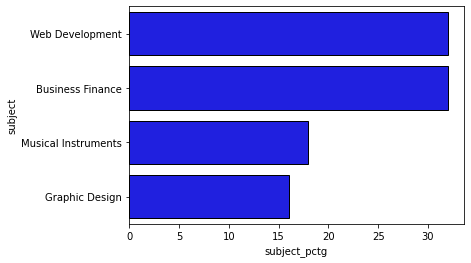

In [81]:
sns.barplot(x = 'subject_pctg', y = 'subject', data = subject_data, color = 'blue', edgecolor = 'black', ci=False)


In [82]:
price_data = pd.read_sql(''' SELECT price, COUNT(price) AS subject_count,
                             100 * COUNT(price) / (SELECT COUNT(*) FROM udemy_updated) AS price_pctg
                             FROM udemy_updated
                             GROUP BY price
                             ORDER BY price_pctg DESC LIMIT 10 ''', udemy_conn)
price_data

,price,subject_count,price_pctg
0,20,3320,22
1,50,1872,12
2,200,1180,8
3,0,1240,8
4,40,868,5
5,95,608,4
6,30,664,4
7,25,616,4
8,195,508,3
9,100,532,3


/var/folders/_z/h3tf3hpj2_3cf75s1gmvbfp00000gn/T/ipykernel_1117/821666350.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'price_pctg', data = price_data, color = 'blue', edgecolor = 'black', ci=False)


<AxesSubplot:xlabel='price', ylabel='price_pctg'>

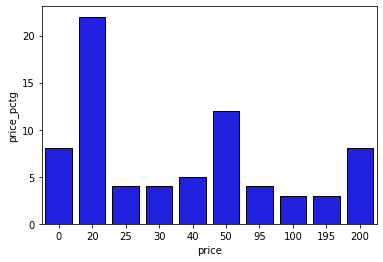

In [83]:
sns.barplot(x = 'price', y = 'price_pctg', data = price_data, color = 'blue', edgecolor = 'black', ci=False)


In [84]:
price_data['price'] =price_data['price'].astype(str)


In [85]:
price_data.dtypes

price            object
subject_count     int64
price_pctg        int64
dtype: object

In [129]:
udemy_by_price_csv = price_data.to_csv('udemy_by_price.csv')
udemy_by_price_csv

In [130]:
subs_subject = pd.read_sql(''' SELECT course_title, subject, num_subscribers FROM udemy_updated
                          GROUP BY subject
                          ORDER BY num_subscribers DESC ''', udemy_conn)

subs_subject

,course_title,subject,num_subscribers
0,Learn Web Designing & HTML5/CSS3 Essentials in...,Web Development,43285
1,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,4529
2,Anatomy and Figure Drawing for Beginners,Graphic Design,2252
3,Ultimate Investment Banking Course,Business Finance,2147


In [133]:
udemy_subs = pd.read_sql(''' SELECT course_title, subject, num_subscribers FROM udemy_updated
                          ORDER BY num_subscribers DESC 
                          LIMIT 30 ''', udemy_conn)
udemy_subs.drop_duplicates().reset_index(drop=True)

,course_title,subject,num_subscribers
0,Learn HTML5 Programming From Scratch,Web Development,268923
1,Coding for Entrepreneurs Basic,Web Development,161029
2,The Web Developer Bootcamp,Web Development,121584
3,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291
4,The Complete Web Developer Course 2.0,Web Development,114512
5,Free Beginner Electric Guitar Lessons,Musical Instruments,101154
6,Web Design for Web Developers: Build Beautiful...,Web Development,98867
7,Learn Javascript & JQuery From Scratch,Web Development,84897


/var/folders/_z/h3tf3hpj2_3cf75s1gmvbfp00000gn/T/ipykernel_1117/909815087.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'num_subscribers', y = 'course_title', hue = 'subject', data = udemy_subs, color = 'blue', edgecolor='black', ci=False)


<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

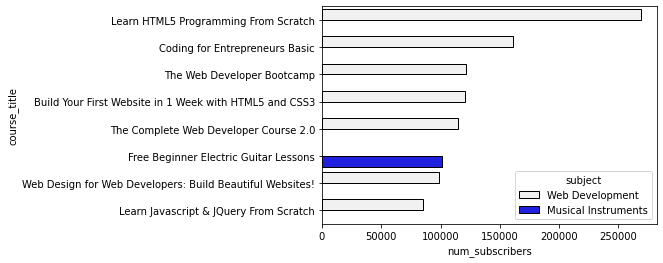

In [108]:
sns.barplot(x = 'num_subscribers', y = 'course_title', hue = 'subject', data = udemy_subs, color = 'blue', edgecolor='black', ci=False)


In [109]:
udemy_subs_csv = udemy_subs.to_csv('udemy_subs.csv')



In [134]:
reviews_data = pd.read_sql(''' SELECT course_title, subject, num_reviews
                             FROM udemy_updated
                             ORDER BY num_reviews DESC LIMIT 30''', udemy_conn)
reviews_data.drop_duplicates().reset_index(drop=True)

,course_title,subject,num_reviews
0,The Web Developer Bootcamp,Web Development,27445
1,The Complete Web Developer Course 2.0,Web Development,22412
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,19649
3,JavaScript: Understanding the Weird Parts,Web Development,16976
4,Modern React with Redux,Web Development,15117
5,Learn and Understand AngularJS,Web Development,11580
6,Learn and Understand NodeJS,Web Development,11123
7,Learn HTML5 Programming From Scratch,Web Development,8629


/var/folders/_z/h3tf3hpj2_3cf75s1gmvbfp00000gn/T/ipykernel_1117/4263534414.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'num_reviews', y = 'course_title', data = reviews_data, color = 'red', edgecolor = 'black', ci=False)


<AxesSubplot:xlabel='num_reviews', ylabel='course_title'>

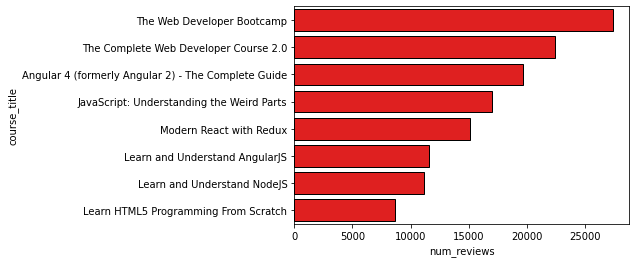

In [111]:
sns.barplot(x = 'num_reviews', y = 'course_title', data = reviews_data, color = 'red', edgecolor = 'black', ci=False)


In [135]:
reviews_lec = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews
                             FROM udemy_updated
                             ORDER BY num_reviews DESC''', udemy_conn)
reviews_lec.drop_duplicates().reset_index(drop=True)

,course_title,subject,num_lectures,num_reviews
0,The Web Developer Bootcamp,Web Development,342,27445
1,The Complete Web Developer Course 2.0,Web Development,304,22412
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649
3,JavaScript: Understanding the Weird Parts,Web Development,85,16976
4,Modern React with Redux,Web Development,150,15117
...,...,...,...,...
3667,Effective Personal Website Building and Hosting,Web Development,11,0
3668,Angular 4 Front To Back,Web Development,68,0
3669,XSD :basics for beginners,Web Development,7,0
3670,AppML :basics for beginners,Web Development,8,0


In [113]:
reviews_lec.dtypes


course_title    object
subject         object
num_lectures     int64
num_reviews      int64
dtype: object

<AxesSubplot:xlabel='num_lectures', ylabel='num_reviews'>

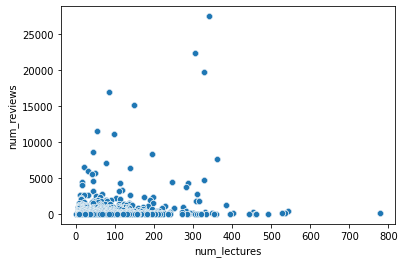

In [114]:
sns.scatterplot(x = 'num_lectures', y = 'num_reviews', data = reviews_lec)


In [136]:
reviews_duration = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews, content_duration, price
                             FROM udemy_updated
                             ORDER BY num_reviews DESC''', udemy_conn)
reviews_duration.drop_duplicates().reset_index(drop=True)

,course_title,subject,num_lectures,num_reviews,content_duration,price
0,The Web Developer Bootcamp,Web Development,342,27445,43.000000,200
1,The Complete Web Developer Course 2.0,Web Development,304,22412,30.500000,200
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649,22.000000,190
3,JavaScript: Understanding the Weird Parts,Web Development,85,16976,11.500000,175
4,Modern React with Redux,Web Development,150,15117,26.500000,180
...,...,...,...,...,...,...
3667,Effective Personal Website Building and Hosting,Web Development,11,0,1.000000,20
3668,Angular 4 Front To Back,Web Development,68,0,8.500000,40
3669,XSD :basics for beginners,Web Development,7,0,0.700000,35
3670,AppML :basics for beginners,Web Development,8,0,0.633333,30


<AxesSubplot:xlabel='content_duration', ylabel='num_reviews'>

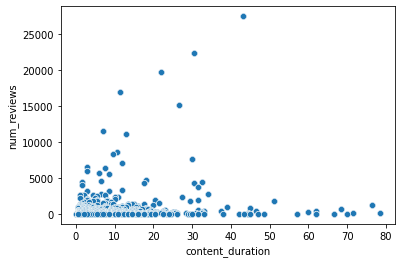

In [116]:
sns.scatterplot(x = 'content_duration', y = 'num_reviews', data = reviews_duration)


In [117]:
reviews_duration_csv = reviews_duration.to_csv('udemy_reviews_duration.csv')


In [118]:
total_enrollment_biz_web = pd.read_sql(''' SELECT subject, num_subscribers, SUM(num_subscribers) AS sum_sub, AVG(price) AS avg_course_price
                                           FROM udemy_updated
                                           GROUP BY subject
                                           ORDER BY sum_sub DESC ''', udemy_conn)
total_enrollment_biz_web

,subject,num_subscribers,sum_sub,avg_course_price
0,Web Development,43285,31922288,77.033333
1,Business Finance,2147,7474844,68.552301
2,Graphic Design,2252,4252592,57.827529
3,Musical Instruments,4529,3386756,49.558824


In [53]:
tot_price = pd.read_sql(''' SELECT subject, num_subscribers, SUM(num_subscribers) AS sum_sub, AVG(price) AS avg_course_price, SUM(price) AS total_revenue
                                           FROM udemy_updated
                                           GROUP BY subject
                                           ORDER BY sum_sub DESC ''', udemy_conn)
tot_price

,subject,num_subscribers,sum_sub,avg_course_price,total_revenue
0,Web Development,43285,23941716,77.033333,277320
1,Business Finance,2147,5606133,68.552301,245760
2,Graphic Design,2252,3189444,57.827529,104610
3,Musical Instruments,4529,2540067,49.558824,101100


/var/folders/_z/h3tf3hpj2_3cf75s1gmvbfp00000gn/T/ipykernel_1117/1424355388.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Business Finance'),
  Text(2, 0, 'Graphic Design'),
  Text(3, 0, 'Musical Instruments')])

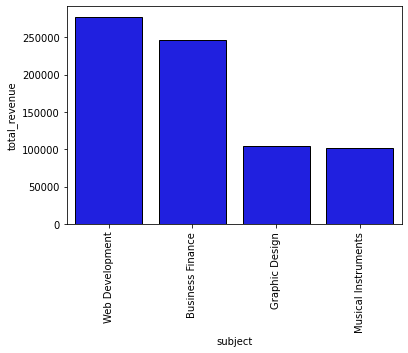

In [54]:
sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)
plt.xticks(rotation=90)

/var/folders/_z/h3tf3hpj2_3cf75s1gmvbfp00000gn/T/ipykernel_1117/2306568310.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Business Finance'),
  Text(2, 0, 'Graphic Design'),
  Text(3, 0, 'Musical Instruments')])

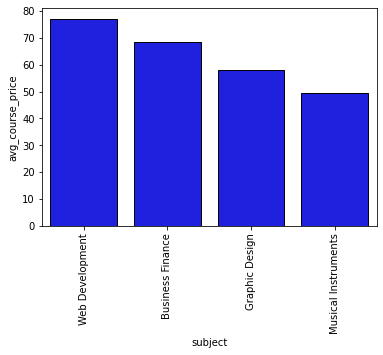

In [55]:
sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)
plt.xticks(rotation=90)